# Vehicle Detection

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.


In [1]:
from vehicle_detection import Pipeline
import glob
import cv2
import matplotlib.pyplot as plt
import pickle

In [2]:
# Initiate the vehicle detection pipeline
pipeline = Pipeline()

In [3]:
# Loat the training data, combine and normalize the features and fit the model
try:
    svc_pickle = pickle.load(open("svc_pickle.p", "rb"))
    pipeline.svc = svc_pickle["svc"]
    pipeline.X_scaler = svc_pickle["X_scaler"]
except (OSError, IOError) as e:
    pipeline.load_training_data()
    pipeline.combine_normalize_features()
    pipeline.fit_model()

    dump_p = {"svc": pipeline.svc, "X_scaler": pipeline.X_scaler}
    pickle.dump(dump_p, open("svc_pickle.p", "wb"))

In [4]:
# Glob the test images directory
test_images = glob.glob('test_images/*.jpg')

In [5]:
# helper function for viewing images in pyplot columns
def side_by_side(images, labels=("", "", ""), cmap='viridis', cols=3):
    f, axes = plt.subplots(1, cols, figsize=(20,10))
    cmapv = cmap
    for idx in range(cols):

        if isinstance(cmap, str) is False:
            cmapv = cmap[idx]

        axes[idx].imshow(images[idx], cmap=cmapv)
        axes[idx].set_title(labels[idx], fontsize=30)

In [6]:
images = []
heatmaps = []

for test_img_path in test_images:
    test_img = cv2.imread(test_img_path)

    draw_img, heatmap = pipeline.run(test_img, clear_boxes=True, thresh=1, calc=True)
    
    images.append(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
    heatmaps.append(heatmap)

ctrans_tosearch.shape (100, 1280, 3)
ctrans_tosearch.shape (275, 1280, 3)
ctrans_tosearch.shape (275, 1280, 3)
0.94 Seconds to find cars...
number of boxes 2
number of boxes 2
number of boxes 2
0.0 Seconds to apply heatmaps...
0.01 Seconds to draw final boxes...
ctrans_tosearch.shape (100, 1280, 3)
ctrans_tosearch.shape (275, 1280, 3)
ctrans_tosearch.shape (275, 1280, 3)
0.89 Seconds to find cars...
number of boxes 9
number of boxes 9
number of boxes 9
0.0 Seconds to apply heatmaps...
0.01 Seconds to draw final boxes...
ctrans_tosearch.shape (100, 1280, 3)
ctrans_tosearch.shape (275, 1280, 3)
ctrans_tosearch.shape (275, 1280, 3)
0.91 Seconds to find cars...
number of boxes 7
number of boxes 10
number of boxes 9
0.0 Seconds to apply heatmaps...
0.01 Seconds to draw final boxes...
ctrans_tosearch.shape (100, 1280, 3)
ctrans_tosearch.shape (275, 1280, 3)
ctrans_tosearch.shape (275, 1280, 3)
0.89 Seconds to find cars...
number of boxes 0
number of boxes 0
number of boxes 0
0.0 Seconds to a

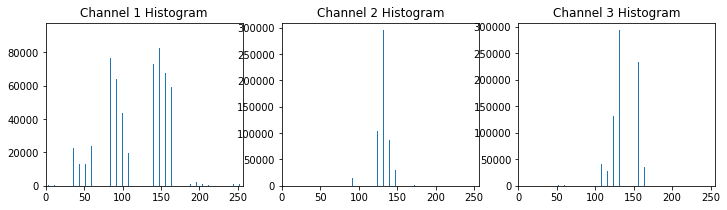

/home/josh/.conda/envs/tfgpu/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


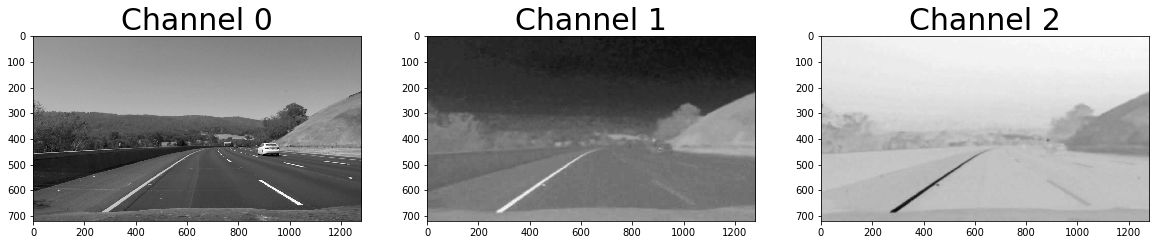

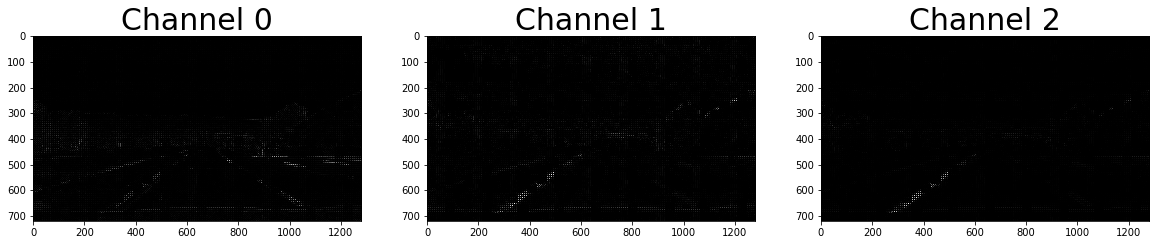

In [7]:
img = cv2.imread(test_images[0])

ctrans_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

pipeline.color_hist(ctrans_img, plot=True)

features1, hog_image1 = pipeline.visualize_hog_features(ctrans_img[:, :, 0])
features2, hog_image2 = pipeline.visualize_hog_features(ctrans_img[:, :, 1])
features3, hog_image3 = pipeline.visualize_hog_features(ctrans_img[:, :, 2])

side_by_side((ctrans_img[:, :, 0], ctrans_img[:, :, 1], ctrans_img[:, :, 2]), labels=("Channel 0","Channel 1","Channel 2"), cmap="gray")
side_by_side((hog_image1, hog_image2, hog_image3), labels=("Channel 0","Channel 1","Channel 2"), cmap="gray")

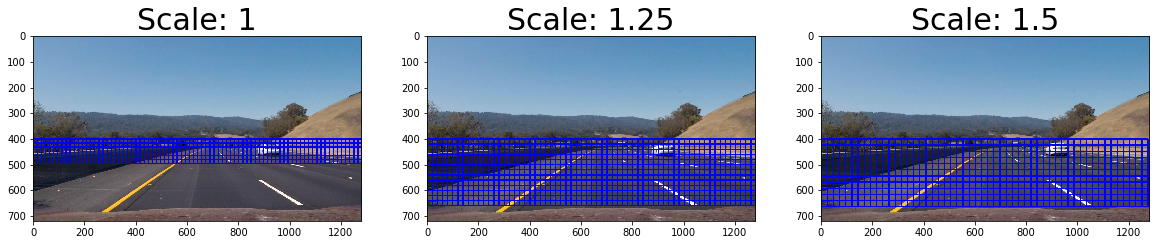

In [8]:
sliding_windows = []
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for params in pipeline.find_params:
    sliding_windows.append(pipeline.visualize_sliding_windows(rgb_img, scale=params[0], ystart=params[1][0], ystop=params[1][1], padding=0))

# Window size 64 px
side_by_side(sliding_windows, labels=("Scale: 1","Scale: 1.25","Scale: 1.5"))

In [9]:
draw_img, heatmap = pipeline.run(img, clear_boxes=True, thresh=1, calc=True)
draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

ctrans_tosearch.shape (100, 1280, 3)
ctrans_tosearch.shape (275, 1280, 3)
ctrans_tosearch.shape (275, 1280, 3)
0.9 Seconds to find cars...
number of boxes 2
number of boxes 2
number of boxes 2
0.0 Seconds to apply heatmaps...
0.01 Seconds to draw final boxes...


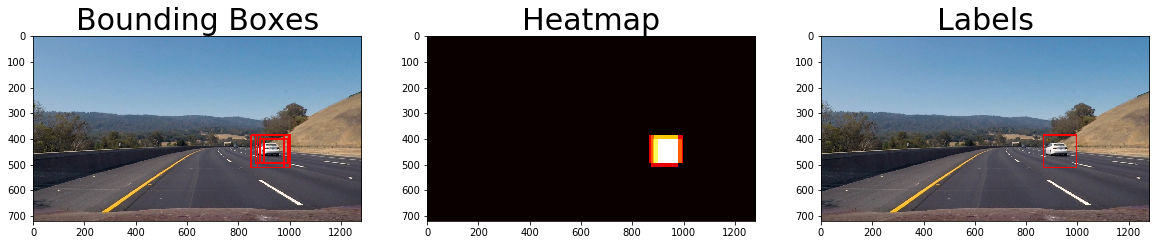

In [10]:
img_with_boxes = pipeline.draw_boxes(img)

img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

side_by_side((img_with_boxes, heatmap, draw_img), labels=("Bounding Boxes","Heatmap","Labels"), cmap=("viridis", "hot", "viridis"))

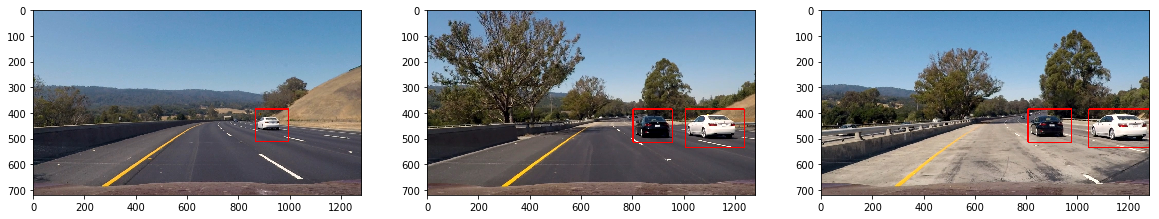

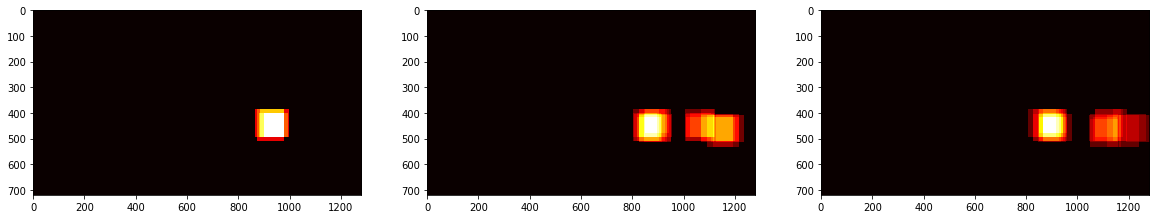

In [11]:
side_by_side(images[0:3])
side_by_side(heatmaps[0:3], cmap="hot")